In [19]:
import fsspec
import xarray as xr
import s3fs
import glob
import matplotlib.pyplot as plt

In [5]:
url = 'gs://pilot-hubs-scratch-ohw/miost/science'
fs, path = fsspec.url_to_fs(url)

In [6]:
fs.ls(path)

['pilot-hubs-scratch-ohw/miost/science/',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230710_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230711_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230712_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230713_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230714_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230715_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230716_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230717_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230718_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230719_20240501.nc',
 'pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230720_20240501.nc',
 'pilot-hubs

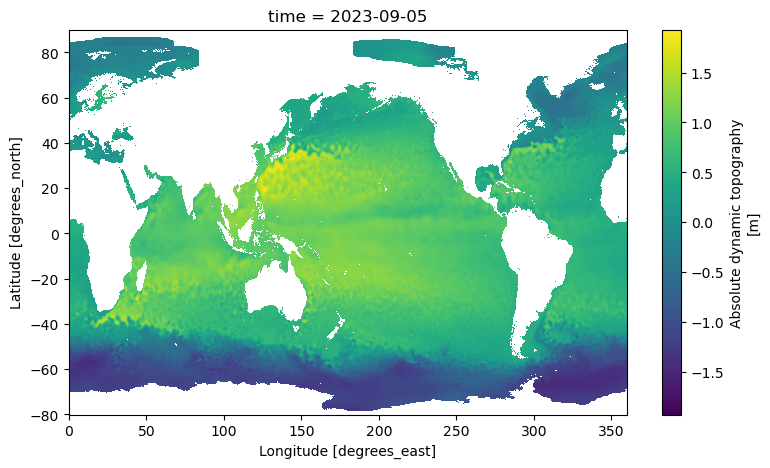

In [21]:
plt.figure(figsize=(9,5))

with fs.open('pilot-hubs-scratch-ohw/miost/science/dt_global_allsat_phy_l4_20230905_20240501.nc') as file:
    ds = xr.open_dataset(file, engine='h5netcdf')
    ds['adt'].plot(cmap='viridis')

In [22]:
opened_files = []
for path in fs.ls(path):
    if '.nc' and '202308' in path:
        opened_files.append(fs.open(path))
mds = xr.open_mfdataset(opened_files)

In [23]:
mds

<xarray.Dataset> Size: 11GB
Dimensions:             (longitude: 3600, latitude: 1701, time: 31, bounds: 2)
Coordinates:
  * longitude           (longitude) float64 29kB 0.0 0.1 0.2 ... 359.8 359.9
  * latitude            (latitude) float32 7kB -80.0 -79.9 -79.8 ... 89.9 90.0
  * time                (time) datetime64[ns] 248B 2023-08-01 ... 2023-08-31
    longitude_bounds    (longitude, bounds) float64 58kB dask.array<chunksize=(3600, 2), meta=np.ndarray>
    latitude_bounds     (latitude, bounds) float64 27kB dask.array<chunksize=(1701, 2), meta=np.ndarray>
Dimensions without coordinates: bounds
Data variables:
    sla                 (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 851, 1800), meta=np.ndarray>
    ugosa               (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 851, 1800), meta=np.ndarray>
    vgosa               (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 851, 1800), meta=np.ndarray>
    relative_vorticity  (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 851, 1800), meta=np.ndarray>
    adt                 (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 851, 1800), meta=np.ndarray>
    ugos                (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 851, 1800), meta=np.ndarray>
    vgos                (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 851, 1800), meta=np.ndarray>
Attributes: (12/45)
    description:                      Miost analysis 
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         
    ...                              ...
    summary:                         Experimental SSALTO/DUACS Delayed-Time L...
    time_coverage_duration:          P1D
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Global Ocean Gr...
    time_coverage_start:             2023-08-01T12:00:00Z
    time_coverage_end:               2023-08-01T12:00:00Z